In [172]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

In [173]:
df = pd.read_csv("2-multiplegradesdataset.csv")

In [174]:
df.head()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
0,4.7,7.3,82.9,3.3,80.7
1,3.8,6.6,87.9,3.3,76.0
2,5.0,6.3,88.3,2.3,89.1
3,6.3,7.6,86.0,3.2,95.9
4,3.6,8.0,89.2,3.3,70.5


In [175]:
df.describe()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
count,50.00000,50.000000,50.000000,50.00000,50.00000
mean,3.66800,7.022000,89.736000,3.09000,76.07000
std,1.40123,0.874419,4.924813,0.89699,11.70915
min,1.10000,4.400000,80.400000,1.50000,56.90000
25%,2.67500,6.500000,85.625000,2.22500,68.07500
50%,3.60000,7.050000,90.100000,3.20000,73.55000
75%,4.50000,7.575000,92.550000,3.57500,84.17500
max,6.80000,8.600000,100.000000,5.70000,100.00000


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Study Hours         50 non-null     float64
 1   Sleep Hours         50 non-null     float64
 2   Attendance Rate     50 non-null     float64
 3   Social Media Hours  50 non-null     float64
 4   Exam Score          50 non-null     float64
dtypes: float64(5)
memory usage: 2.1 KB


In [177]:
df.isnull().sum()

Study Hours           0
Sleep Hours           0
Attendance Rate       0
Social Media Hours    0
Exam Score            0
dtype: int64

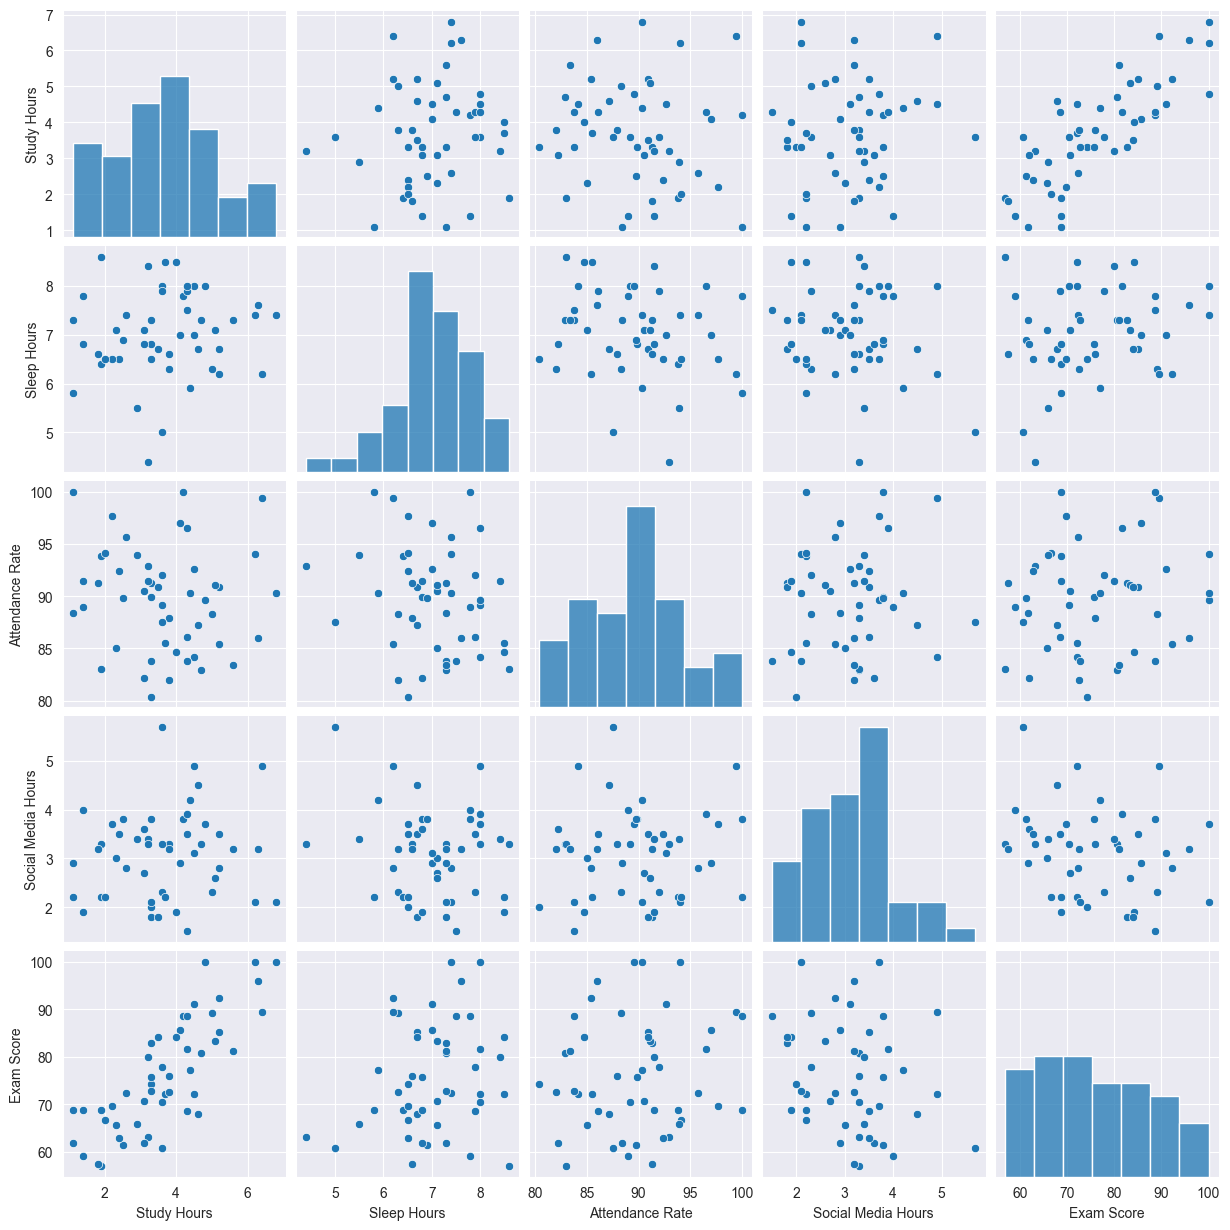

In [178]:
sns.pairplot(df)

In [179]:
df.corr()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
Study Hours,1.000000,0.114015,-0.112860,0.115023,0.804266
Sleep Hours,0.114015,1.000000,-0.222024,-0.177166,0.227694
Attendance Rate,-0.112860,-0.222024,1.000000,0.068272,0.123791
Social Media Hours,0.115023,-0.177166,0.068272,1.000000,-0.248743
Exam Score,0.804266,0.227694,0.123791,-0.248743,1.000000


<Axes: xlabel='Study Hours', ylabel='Exam Score'>

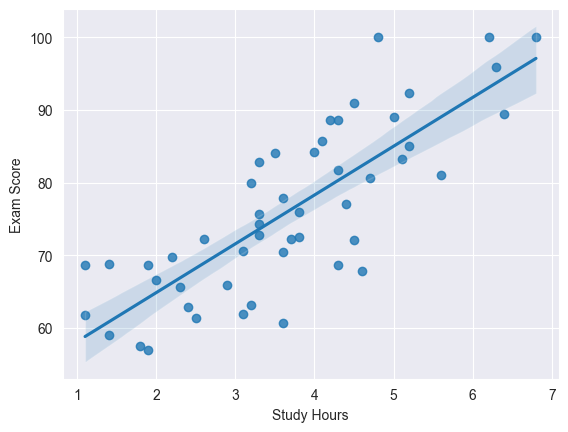

In [180]:
sns.regplot(x = df["Study Hours"], y = df["Exam Score"])

In [181]:
df.columns

Index(['Study Hours', 'Sleep Hours', 'Attendance Rate', 'Social Media Hours',
       'Exam Score'],
      dtype='object')

In [182]:
# independent and dependent features
X = df[['Study Hours', 'Sleep Hours', 'Attendance Rate', 'Social Media Hours']]
y = df[['Exam Score']]

In [183]:
X.head()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours
0,4.7,7.3,82.9,3.3
1,3.8,6.6,87.9,3.3
2,5.0,6.3,88.3,2.3
3,6.3,7.6,86.0,3.2
4,3.6,8.0,89.2,3.3


In [184]:
y.head()

,Exam Score
0,80.7
1,76.0
2,89.1
3,95.9
4,70.5


In [185]:
# Train - Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=15)
X_train.head(3)

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours
9,4.8,8.0,89.6,3.7
44,1.8,6.6,91.3,3.2
47,5.6,7.3,83.4,3.2


In [186]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [187]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [188]:
X_train

array([[ 7.64922342e-01,  1.07637448e+00,  2.70413080e-03,
         6.75932027e-01],
       [-1.60676425e+00, -3.94765312e-01,  3.42883785e-01,
         1.46070057e-01],
       [ 1.39737210e+00,  3.40804586e-01, -1.23795108e+00,
         1.46070057e-01],
       [-1.92298913e+00, -1.84602484e-01,  3.82904921e-01,
        -1.23157107e+00],
       [ 2.11528804e-01,  2.55603439e-02,  1.48348616e+00,
        -1.71847126e-01],
       [ 2.90585024e-01,  8.66211656e-01,  2.08380319e+00,
         7.81904421e-01],
       [-2.56398550e-02, -7.10009554e-01, -1.51809903e+00,
         1.46070057e-01],
       [ 9.23034781e-01, -7.10009554e-01, -2.57433252e-01,
        -8.07681490e-01],
       [-4.20920953e-01,  3.40804586e-01, -1.15790881e+00,
        -1.01962628e+00],
       [-2.56398550e-02, -3.94765312e-01, -3.37475524e-01,
         2.52042451e-01],
       [ 3.69641243e-01,  5.50967414e-01, -1.15790881e+00,
        -1.65546064e+00],
       [-9.74314491e-01,  4.45886000e-01,  1.22334877e+00,
      

In [189]:
from sklearn.linear_model import LinearRegression

In [190]:
r = LinearRegression()

In [191]:
r.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [192]:
X_test[0]

array([-1.29053937, -0.49984673,  1.62356013,  0.67593203])

In [193]:
df.iloc[0]

Study Hours            4.7
Sleep Hours            7.3
Attendance Rate       82.9
Social Media Hours     3.3
Exam Score            80.7
Name: 0, dtype: float64

In [194]:
new_student = [[5,7,90,4]]
new_student_scaled = scaler.transform(new_student)

c:\Users\baris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [195]:
r.predict(new_student_scaled)

array([[82.23465969]])

In [196]:
# prediction

In [197]:
y_pred = r.predict(X_test)

In [198]:
y_pred

array([[ 67.04704385],
       [ 57.90545589],
       [ 83.63084813],
       [ 63.69399367],
       [ 69.73079557],
       [ 80.76485587],
       [ 93.76445033],
       [ 65.93953528],
       [ 64.58675718],
       [ 78.42296106],
       [ 56.67860558],
       [ 64.44046585],
       [102.60438643]])

In [199]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [200]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print("mse: ",mse)
print("mae: ",mae)

mse:  14.600589378986278
mae:  3.2770264859627876


In [201]:
score = r2_score(y_test,y_pred)
print("r2 score: ",score)

r2 score:  0.9156707345772709


In [202]:
# adjusted score
r2adj = 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
r2adj

0.8735061018659063

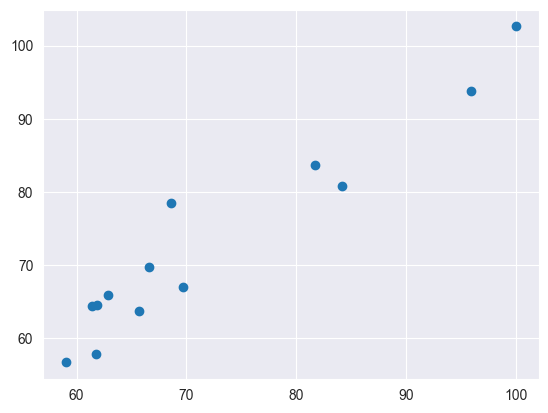

In [203]:
plt.scatter(y_test,y_pred)

In [204]:
y_test

,Exam Score
35,69.7
37,61.8
41,81.7
26,65.7
38,66.6
43,84.1
3,95.9
33,62.9
30,61.9
36,68.6


In [205]:
y_pred

array([[ 67.04704385],
       [ 57.90545589],
       [ 83.63084813],
       [ 63.69399367],
       [ 69.73079557],
       [ 80.76485587],
       [ 93.76445033],
       [ 65.93953528],
       [ 64.58675718],
       [ 78.42296106],
       [ 56.67860558],
       [ 64.44046585],
       [102.60438643]])

In [206]:
residuals = y_test - y_pred

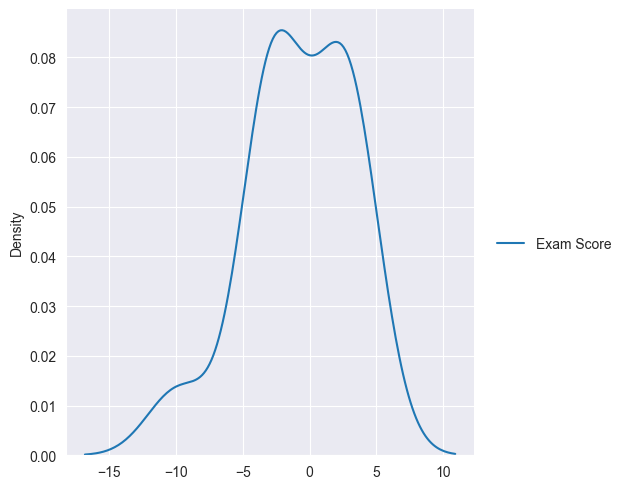

In [207]:
sns.displot(residuals,kind="kde")

In [208]:
r.intercept_

array([77.41081081])

In [209]:
r.coef_

array([[ 9.28014703,  1.78967062,  3.24340001, -4.08127695]])

In [210]:
X.head()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours
0,4.7,7.3,82.9,3.3
1,3.8,6.6,87.9,3.3
2,5.0,6.3,88.3,2.3
3,6.3,7.6,86.0,3.2
4,3.6,8.0,89.2,3.3
